In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
df = pd.read_csv('../../data/maildata.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


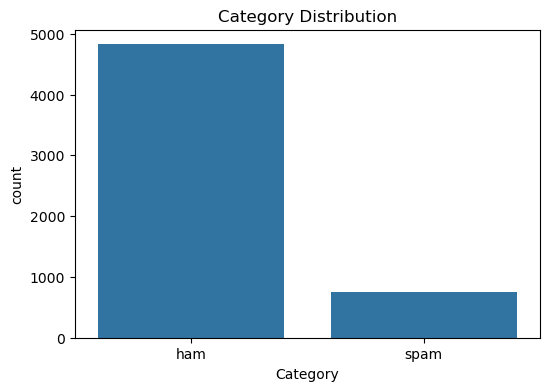

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=df)
plt.title("Category Distribution")
plt.show()

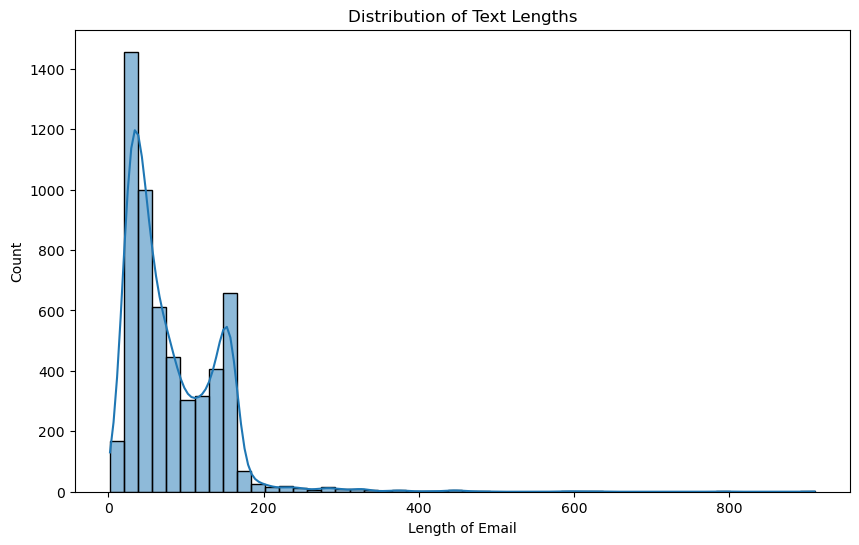

In [19]:
df['text_length'] = df['Message'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], kde=True, bins=50)
plt.title("Distribution of Text Lengths")
plt.xlabel("Length of Email")
plt.ylabel("Count")
plt.show()


In [20]:
spam_words = ' '.join(df[df['Category'] == 'spam']['Message'])
ham_words = ' '.join(df[df['Category'] == 'ham']['Message'])


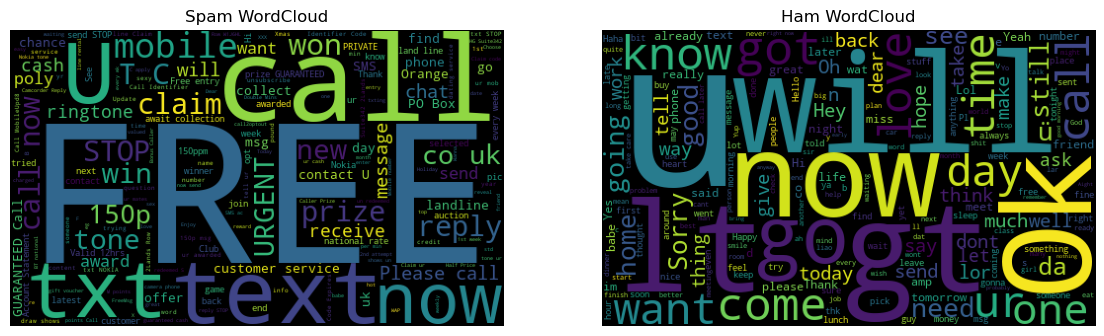

In [21]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.title("Spam WordCloud")
wc = WordCloud(width=500, height=300).generate(spam_words)
plt.imshow(wc)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Ham WordCloud")
wc = WordCloud(width=500, height=300).generate(ham_words)
plt.imshow(wc)
plt.axis('off')

plt.show()

In [22]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [23]:
def clean_and_stem(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = ' '.join([ps.stem(word) for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['Message'].apply(clean_and_stem)

In [24]:
df.to_csv('data/maildata_cleaned.csv', index=False)
